----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Practical exam on Computer Vision
 
( November, 6th, 2023 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


This is the practical exam that should be developed during 2 hours. Note that to approve the exam, both parts (theoretical and practical ones) should be approved. Each exercise is defined with the corresponding score. 

## Exercise 1

### Instagram filter

Carles and Anna went to a bussiness trip and took many photos. Sadly, the camera they were using was defective and the images got noise. They want to show their friends a nice photo they took though instagram, but do not know how to improve the quality.

### Ex.1) (1 point) Load the image `men_and_woman_noise.jpg`. Process the image applying a filter to smooth the image and then, after smoothing the image, convert it to gray. Finally, save the result as `men_and_woman_gray.jpg` and plot the three images (the original, the smoothed picture and the gray picture). Set the corresponding titles of the images and their descriptions, containing the shape, dtype, max and min values.

![img](images/men_and_woman_noise.jpg)

C:\Users\adria\AppData\Local\Temp\ipykernel_13336\72803674.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  loaded_image = imageio.imread('images/men_and_woman_noise.jpg')


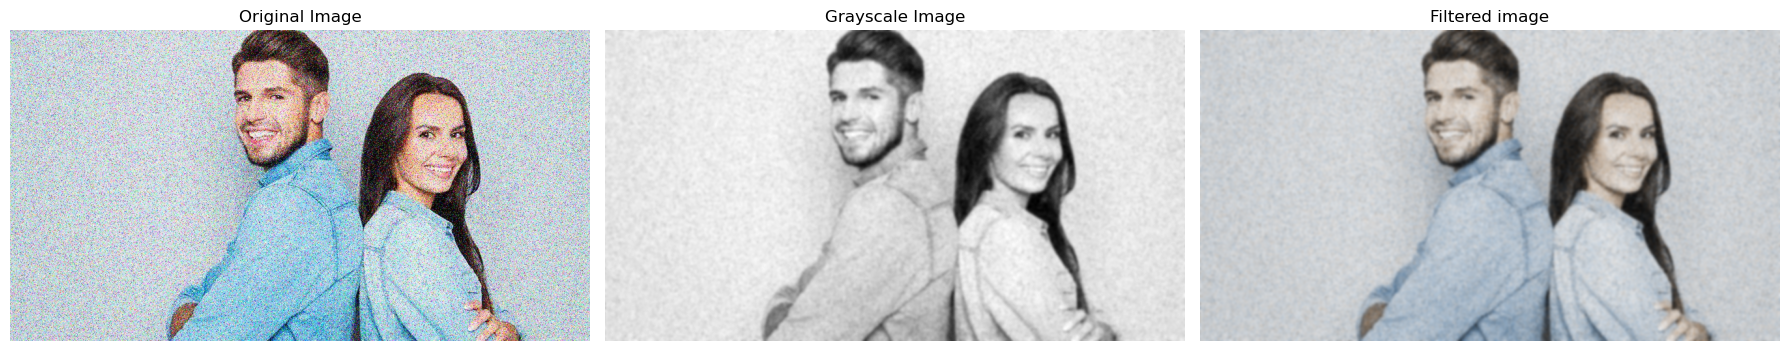

In [36]:
import warnings
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, color
from skimage.filters import gaussian
from skimage.color import rgb2gray  # Importación añadida
# Filter out the low-contrast warning
warnings.filterwarnings("ignore", category=UserWarning)

sigma = 2 #Use a value of sigma that fixes the noise but still allows the photo to be published 

#your solution
# Load saved image
loaded_image = imageio.imread('images/men_and_woman_noise.jpg')

gaussian_sigma1 = gaussian(loaded_image, sigma=sigma)

grayscale_image = color.rgb2gray(gaussian_sigma1)
grayscale_image_uint8 = (grayscale_image * 255).astype(np.uint8)

# Save grayscale image
imageio.imwrite('men_and_woman_gray.jpg', grayscale_image_uint8)

# Show all images in a single figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Show original image
axes[0].imshow(loaded_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide axes

# Show image in grayscale
axes[1].imshow(grayscale_image_uint8, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')  # Hide axes

# Show binary image
axes[2].imshow(gaussian_sigma1, cmap='gray')
axes[2].set_title('Filtered image')
axes[2].axis('off')  # Hide axes

plt.tight_layout()  # Adjust spacing
plt.show()

## Exercise 2

### Sunrise at the beach

Marc has been working all day, gazing out of the window at the beautiful day outside. When he finished, he decided to go to the beach, even though it was late. This is frustrating because he wanted to sunbathe to get a bit tanner.

### Ex.2.1) (2 points) Help Marc get tanner. Load the image `guy_in_swimsuit.jpg` from the folder `images`. Blend the original colors of the image with a more pronounced red aspect by adding to it the RGB colors: (161,61,45). Do this only on Marc (do not apply this to the white areas surrounding Marc). Also make sure that marc tanned image is resized to the `sunrise.jpg` image dimensions as you will need it for the next exercise. 

**Hint:** To blend the image and the rgb colors provided, you can mathematically add them with same weights and making sure the result does not go beyond the right range.

Your output should look as follows: 

![img](images/marcnottanned_marctanned.jpg)

C:\Users\adria\AppData\Local\Temp\ipykernel_13336\2327422787.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  marc = imageio.imread('images/guy_in_swimsuit.jpg')


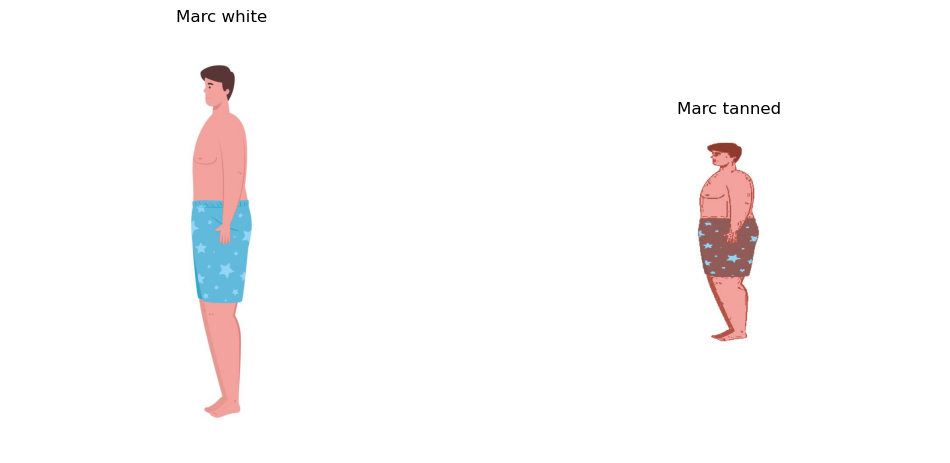

In [182]:
from skimage.transform import resize
from skimage import exposure, transform
#your solution
marc = imageio.imread('images/guy_in_swimsuit.jpg')

common_size = (360, 640)
marc_resized = transform.resize(marc, common_size, anti_aliasing=True)
marc_resized = (marc_resized * 255).astype(np.uint8)  # Convertir a uint8 después del redimensionamiento

marc_filter = np.array([161, 61, 45])  # Barbie
mask = np.all(marc_resized < [240, 240, 240], axis=-1)

# Crear una copia de la imagen para aplicar el filtro
marcNew = np.copy(marc_resized)
marcNew[mask] = (marc_resized[mask] * 0.25 + marc_filter * 0.75).astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(marc, cmap='gray')
axes[0].set_title('Marc white')
axes[0].axis('off')

# Show image in grayscale
axes[1].imshow(marcNew)
axes[1].set_title('Marc tanned')
axes[1].axis('off')

plt.show()

### Ex.2.2) (1.5 point) Take Marc to the beach: 

Overlap the image of Marc tanned to the image of the sunrise (`sunrise.jpg`). Display the 3 following images:

![img](images/marc_tanned_in_the_beach_2_2.jpg)

**Hint:** Instead of the white area surrounding Marc, you can substitute that for the sunrise correspondent pixels, as the images are of the same size. 

C:\Users\adria\AppData\Local\Temp\ipykernel_13336\2033671987.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sunrise = imageio.imread('images/sunrise.jpg')


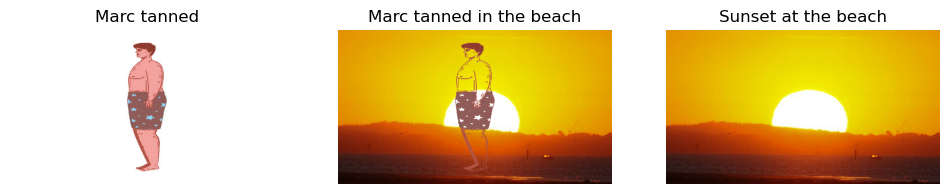

'\nosea si tiene mascara es asi: \nmarc_on_beach[mask] = marcNew[mask]\n\nsi NO tiene mascara es asi:\nfor c in range(3):  # Para cada canal de color (R, G, B)\n    marc_on_sunrise[mask, c] = marc_resized[mask, c\n    '

In [190]:
#your solution
sunrise = imageio.imread('images/sunrise.jpg')
# Crear la imagen final donde Marc está superpuesto en la playa

marc_on_beach = np.copy(sunrise)
marc_on_beach[mask] = marcNew[mask]

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(marcNew, cmap='gray')
axes[0].set_title('Marc tanned')
axes[0].axis('off')

# Show image in grayscale
axes[1].imshow(marc_on_beach)
axes[1].set_title('Marc tanned in the beach')
axes[1].axis('off')

# Show image in grayscale
axes[2].imshow(sunrise)
axes[2].set_title('Sunset at the beach')
axes[2].axis('off')

plt.show()

'''
osea si tiene mascara es asi: 
marc_on_beach[mask] = marcNew[mask]

si NO tiene mascara es asi:
for c in range(3):  # Para cada canal de color (R, G, B)
    marc_on_sunrise[mask, c] = marc_resized[mask, c
    '''

## Exercise 3

### A day in the garden

Bees are essential pollinators in the ecosystem and play a crucial role in the reproduction of many plant species. However, their visual acuity for details, such as small objects or fine details, is not as good as that of humans. In this exercise we will guide them to the flowers within the garden, facilitating their pollination efforts.

### Ex.3.1) (1.5 point) Load the image `yellow_flower.jpeg` and show the edges of the image using the Prewitt, Sobel and Canny methods.

![img](images/yellow_flower.jpeg)

C:\Users\adria\AppData\Local\Temp\ipykernel_13336\3728846035.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  loaded_image = imageio.imread('images/yellow_flower.jpeg')


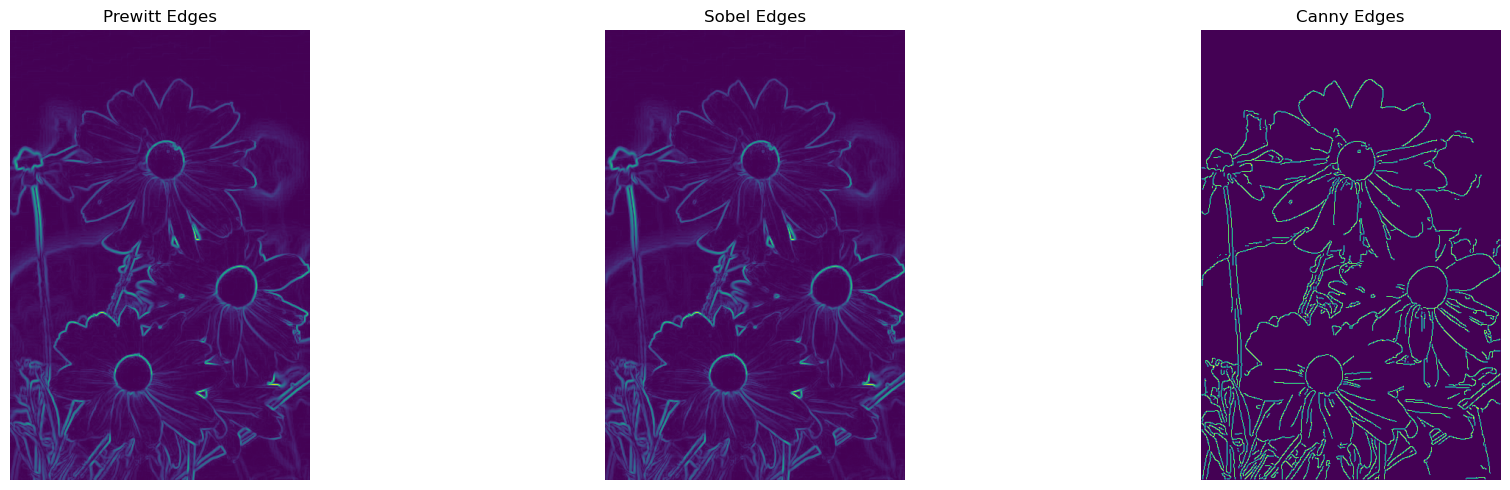

In [88]:
from skimage.color import rgb2gray, rgba2rgb 
from skimage import filters, feature

#your solution
# Load saved image
loaded_image = imageio.imread('images/yellow_flower.jpeg')
gray_image = color.rgb2gray(loaded_image)

# Aplicar el filtro de contorno Prewitt
edges_prewitt = filters.prewitt(gray_image)

# Aplicar el filtro de contorno Sobel
edges_sobel = filters.sobel(gray_image)

# Aplicar el filtro de contorno Canny con diferentes parámetros de sigma
edges_canny = feature.canny(gray_image, sigma=1)  # Puedes ajustar sigma para observar diferentes resultados

# Visualización de los resultados en subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Contornos con Prewitt
axes[0].imshow(edges_prewitt)
axes[0].set_title('Prewitt Edges')
axes[0].axis('off')

# Contornos con Sobel
axes[1].imshow(edges_sobel)
axes[1].set_title('Sobel Edges')
axes[1].axis('off')

# Contornos con Canny
axes[2].imshow(edges_canny)
axes[2].set_title('Canny Edges')
axes[2].axis('off')

plt.tight_layout()
plt.show()


### Ex.3.2) (1 point) Help the bees in the garden to localize the flowers so they can polinize them: 

Overlap the contours obtained using the previous methods over the image. Display them in a grid of 1x3: 

![img](images/edges_flower.jpg)

**Hint:** Prewitt and Sobel need to be binarized. You can use a threshold of 0.1 for this. 

C:\Users\adria\AppData\Local\Temp\ipykernel_13336\529659465.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  loaded_image = imageio.imread('images/yellow_flower.jpeg')


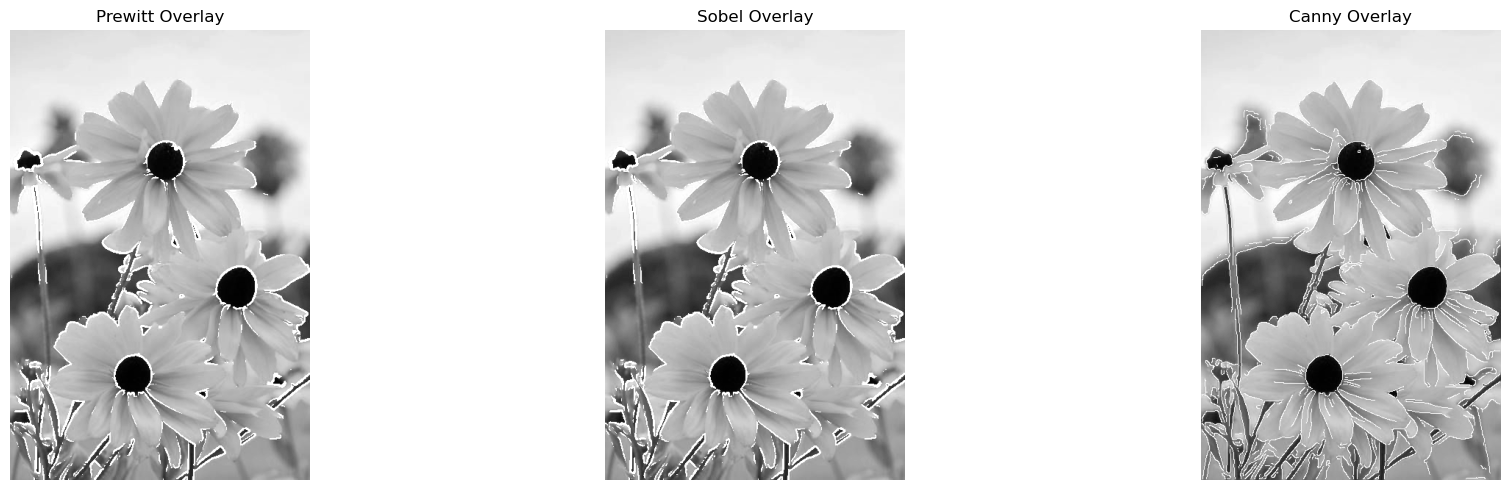

In [80]:
#your solution
loaded_image = imageio.imread('images/yellow_flower.jpeg')
gray_image = rgb2gray(loaded_image)

# Aplicar los filtros de contorno
edges_prewitt = filters.prewitt(gray_image)
edges_sobel = filters.sobel(gray_image)
edges_canny = feature.canny(gray_image, sigma=1)

# Binarizar los contornos de Prewitt y Sobel con un umbral de 0.1
edges_prewitt_bin = edges_prewitt > 0.1
edges_sobel_bin = edges_sobel > 0.1

# Superponer los contornos binarizados sobre la imagen original
prewitt_overlay = np.where(edges_prewitt_bin, 1, gray_image)  # Donde hay borde, coloca 1 (blanco), si no, deja el original
sobel_overlay = np.where(edges_sobel_bin, 1, gray_image)
canny_overlay = np.where(edges_canny, 1, gray_image)

# Visualización en una cuadrícula de 1x3
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Imagen con contornos de Prewitt superpuestos
axes[0].imshow(prewitt_overlay, cmap='gray')
axes[0].set_title('Prewitt Overlay')
axes[0].axis('off')

# Imagen con contornos de Sobel superpuestos
axes[1].imshow(sobel_overlay, cmap='gray')
axes[1].set_title('Sobel Overlay')
axes[1].axis('off')

# Imagen con contornos de Canny superpuestos
axes[2].imshow(canny_overlay, cmap='gray')
axes[2].set_title('Canny Overlay')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Ex.3.3) (1.5 point) Use felzenszwalb segmentation function to detect the edges of the of the image `blue_flower.jpg`: 

Which set of parameters is better for felzenszwalb?:

* n_scales=100, sigma=0.2, min_size=100
* n_scales=300, sigma=0.5, min_size=100
* n_scales=500, sigma=1, min_size=100

Visualize the original image and the result of applying every set of parameters. Comment the effect of every parameter. Do you think the segmentation could be improved? Which parameter would you change?

C:\Users\adria\AppData\Local\Temp\ipykernel_13336\3664743527.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('images/blue_flower.jpg')


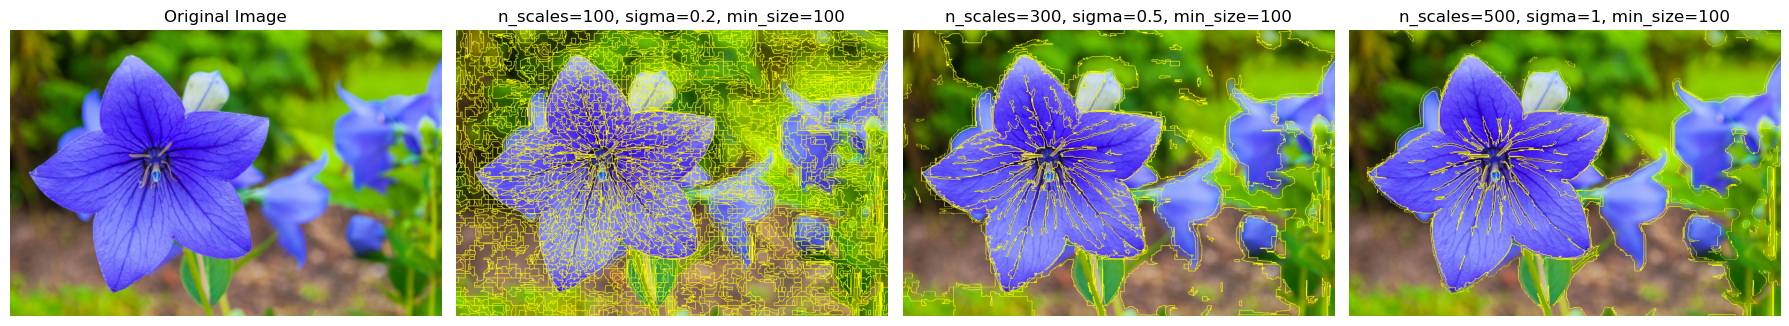

In [76]:
from skimage.segmentation import felzenszwalb, mark_boundaries
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt


#your solution
#imagen original
image = imageio.imread('images/blue_flower.jpg')
#copia de imagen original

#default
n_scales_100 = felzenszwalb(image, scale=100, sigma=0.2, min_size=100)
#sigma_2
n_scales_300 = felzenszwalb(image, scale=300, sigma=0.5, min_size=100)
#sigma_5
n_scales_500 = felzenszwalb(image, scale=500, sigma=1, min_size=100)

# Show all three images in a single figure
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Display original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')  

# Display image with black frame
axes[1].imshow(mark_boundaries(image, n_scales_100))
axes[1].set_title('n_scales=100, sigma=0.2, min_size=100')
axes[1].axis('off')  

# Display image with green frame
axes[2].imshow(mark_boundaries(image, n_scales_300)) #mark_boundaries(campeonas_image,sigma_2)
axes[2].set_title('n_scales=300, sigma=0.5, min_size=100')
axes[2].axis('off')  

# Display image
axes[3].imshow(mark_boundaries(image, n_scales_500))
axes[3].set_title('n_scales=500, sigma=1, min_size=100')
axes[3].axis('off')  

plt.tight_layout()  
plt.show()

### Ex.3.4) (1.5 point) Use the SLIC segmentation function to detect the boundaries of the image `blue_flower.jpg`: 

Which set of parameters is better for slic?:

* n_segments=50, compactness=10, sigma=5
* n_segments=200, compactness=10,sigma=1
* n_segments=500, compactness=10,sigma=3

Visualize the original image and the result of applying every set of parameters. Comment the effect of every parameter. Do you think the segmentation could be improved? Which parameter would you change?

C:\Users\adria\AppData\Local\Temp\ipykernel_13336\3960095549.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('images/blue_flower.jpg')


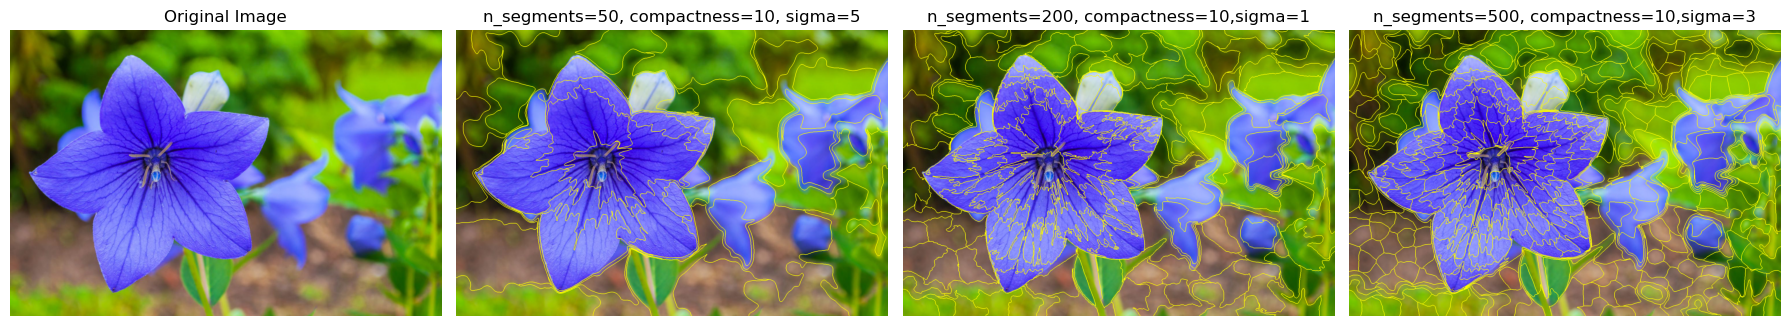

In [72]:
from skimage.segmentation import slic, mark_boundaries
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt

#your solution
#imagen original
image = imageio.imread('images/blue_flower.jpg')
#copia de imagen original

#default
n_segments_50 = slic(image, n_segments=50, compactness=10, sigma=5)
#sigma_2
n_segments_200 = slic(image, n_segments=200, compactness=10, sigma=1)
#sigma_5
n_segments_500 = slic(image, n_segments=500, compactness=10, sigma=3)

# Show all three images in a single figure
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Display original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')  

# Display image with black frame
axes[1].imshow(mark_boundaries(image, n_segments_50))
axes[1].set_title('n_segments=50, compactness=10, sigma=5')
axes[1].axis('off')  

# Display image with green frame
axes[2].imshow(mark_boundaries(image, n_segments_200)) #mark_boundaries(campeonas_image,sigma_2)
axes[2].set_title('n_segments=200, compactness=10,sigma=1')
axes[2].axis('off')  

# Display image
axes[3].imshow(mark_boundaries(image, n_segments_500))
axes[3].set_title('n_segments=500, compactness=10,sigma=3')
axes[3].axis('off')  

plt.tight_layout()  
plt.show()